**Predicting probability of purchase based on customer’s activity**


The dataset has 12330 unique sessions over a period of 12 months that can be used to predict the behaviour of customers on the website. The target variable is imbalanced with a proportion of majority class (True) being 84.5% and False being 15.5%. The dataset has parameters of google analytics that can be used to predict the revenue generated by customers.

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import time
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [90]:
data = pd.read_csv('online_shoppers_intention.csv')

In [91]:
data.shape

(12330, 18)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [93]:
#For checking null entries
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [94]:
data['Revenue'] = data['Revenue'].astype(int)
data['Revenue'].value_counts()#counting each unique value

0    10422
1     1908
Name: Revenue, dtype: int64

In [95]:
data['Weekend'] = data['Weekend'].astype(int)
data['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [96]:
data = pd.get_dummies(data = data, columns=['Month', 'VisitorType'], drop_first=True)
data.shape

(12330, 27)

In [97]:
x = data.drop(columns='Revenue')#except revenue
y = data['Revenue']#revenue
#0.2=20%for testing and 80%for training
#random dataset gives a shuffled dataset
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)
#input featuers and target values
X_train=xTrain
Y_train=yTrain
X_test=xTest
Y_test=yTest

In [98]:
#creating list to store all machine learning algorithms
classification_models = {}

KNN


algo for classification and regression tasks. 
find the K closest data points to  given  points and then use the values of those points to predict the label or value of the query point.

Best k is 10 with score 0.868816651571057
The time of execution of above program is : 8.256762981414795
Accuracy score :  85.40145985401459


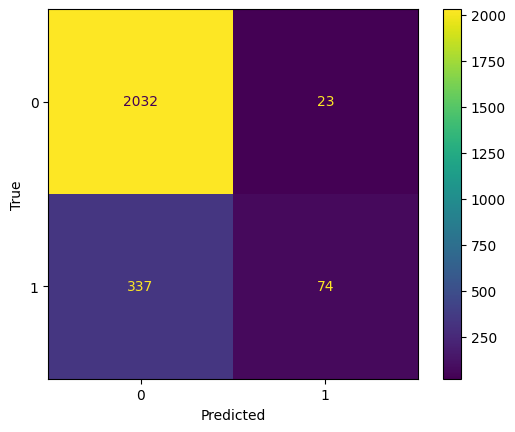

Accuracy: 0.854
Precision: 0.763
Recall: 0.180
F1 Score: 0.291
Sensitivity: 0.180
Specifity: 0.989
Error Rate: 0.146
TPR: 0.180
FPR: 0.011
AUC: 0.584


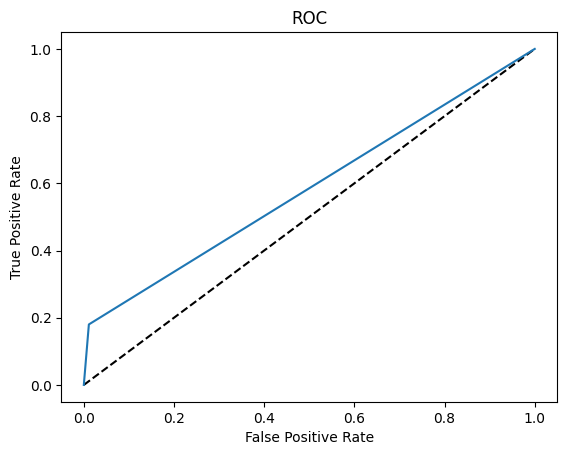

In [99]:
# record start time
start = time.time()
# to find the best k 
score = 0
scores, highscore, bestk = 0, 0, 0

for k in range(3,12):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train)
    score = scores.mean()
    if score>highscore:
        highscore = score
        bestk = k
print('Best k is {} with score {}'.format(bestk, highscore))
knn = KNeighborsClassifier(n_neighbors=bestk)
knn.fit(X_train,Y_train)
# prediction 
y_predict = knn.predict(X_test)
# record end time
end = time.time()
print("The time of execution of above program is :", time.time()-start)
knn_accuracy = accuracy_score(Y_test,y_predict)*100
print('Accuracy score : ', knn_accuracy)


classification_models["KNN"] = knn_accuracy
# prediction visualization
cm = confusion_matrix(Y_test,y_predict)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


TN = cm[0,0]#true negative
TP = cm[1,1]#true positive
FP = cm[0,1]#false positive
FN = cm[1,0]#false negative

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(Y_test, y_predict)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Decision Tree Classifier


used for both classification and regression tasks. The algorithm works by recursively partitioning the data into subsets based on the values of the input features until a stopping criterion is met.

The time of execution of above program is : 0.07672834396362305
Accuracy score :  86.00973236009733


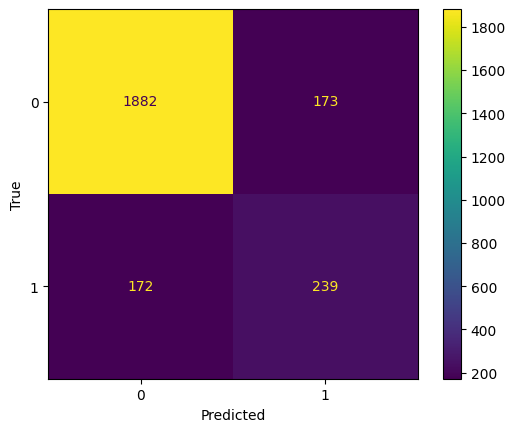

Accuracy: 0.860
Precision: 0.580
Recall: 0.582
F1 Score: 0.581
Sensitivity: 0.582
Specifity: 0.916
Error Rate: 0.140
TPR: 0.582
FPR: 0.084
AUC: 0.749


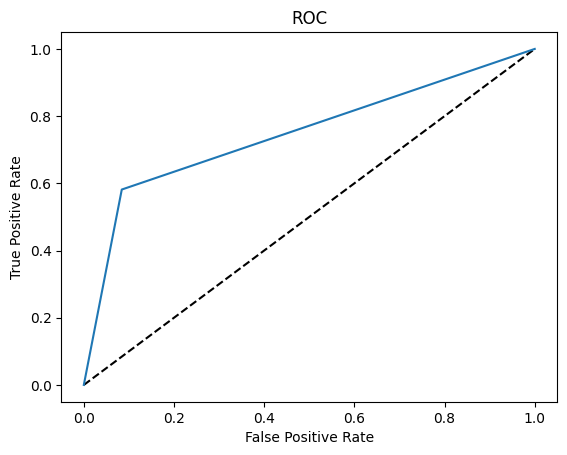

In [100]:
# record start time
start = time.time()

tree_ = DecisionTreeClassifier()
tree_.fit(X_train,Y_train)
Y_pred = tree_.predict(X_test)

# record end time
end = time.time()
print("The time of execution of above program is :", time.time()-start)

dt_accuracy = accuracy_score(Y_test, Y_pred)*100
print('Accuracy score : ', dt_accuracy)

classification_models["Decision Tree Classifier"] = dt_accuracy
# prediction visualization
cm = confusion_matrix(Y_test,Y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

SVM-support vector machine


 used for both classification and regression tasks. The algorithm works by finding the hyperplane that best separates the data into different classes or fits the target variable in the case of regression.

The time of execution of above program is : 3.1215481758117676
Accuracy score :  83.4955393349554


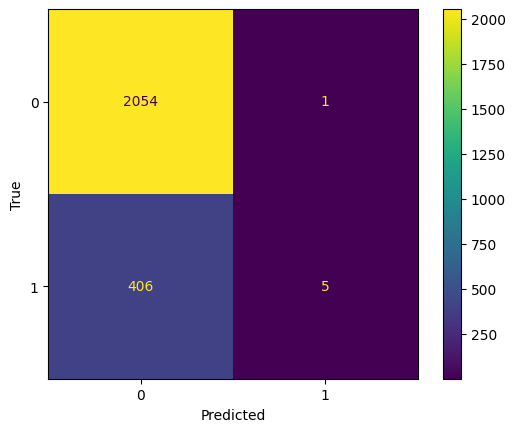

Accuracy: 0.835
Precision: 0.833
Recall: 0.012
F1 Score: 0.024
Sensitivity: 0.012
Specifity: 1.000
Error Rate: 0.165
TPR: 0.012
FPR: 0.000
AUC: 0.506


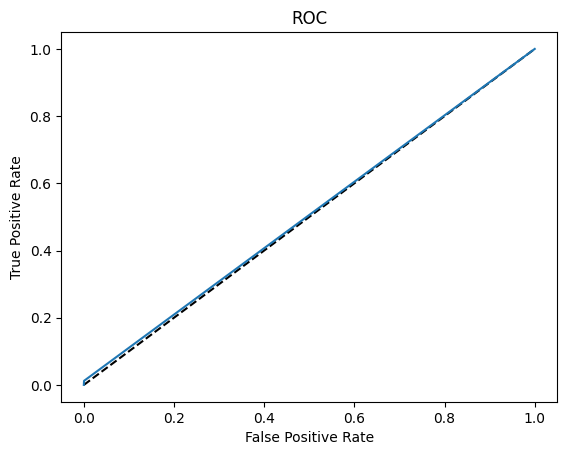

In [101]:
# record start time
start = time.time()

model = SVC()
model.fit(X_train, Y_train)
Y_preds = model.predict(X_test)

# record end time
end = time.time()
print("The time of execution of above program is :", time.time()-start)

svm_accuracy = accuracy_score(Y_test, Y_preds)*100
print('Accuracy score : ',svm_accuracy)

classification_models["SVM"] = svm_accuracy
# prediction visualization
cm = confusion_matrix(Y_test,Y_preds)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(Y_test, Y_preds)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Naive Bayes-Gaussian 


It assumes that the features are normally distributed, and calculates the mean and variance of each feature for each class in the training data. Then, for each test instance, it calculates the probability of that instance belonging to each class based on the normal distribution of the feature values and applies Bayes' theorem to calculate the posterior probability of each class given the input data. Finally, it selects the class with the highest probability as the predicted class.

The time of execution of above program is : 0.013998031616210938
Accuracy score :  80.21086780210868


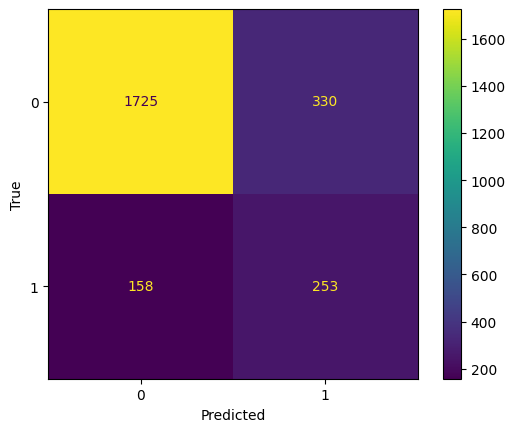

Accuracy: 0.802
Precision: 0.434
Recall: 0.616
F1 Score: 0.509
Sensitivity: 0.616
Specifity: 0.839
Error Rate: 0.198
TPR: 0.616
FPR: 0.161
AUC: 0.727


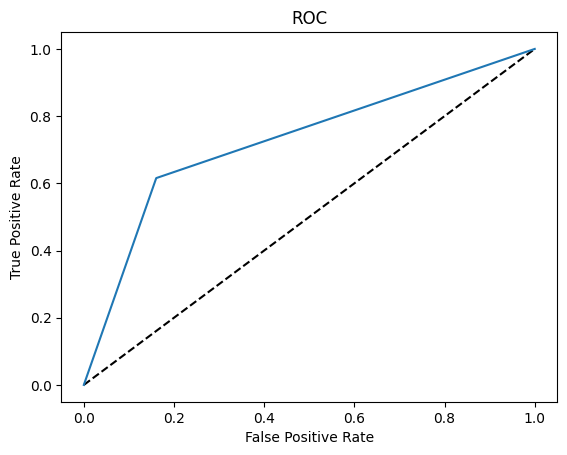

In [102]:
# record start time
start = time.time()

model = GaussianNB()  
model.fit(X_train, Y_train)
Y_predn = model.predict(X_test)

# record end time
end = time.time()
print("The time of execution of above program is :", time.time()-start)

nb_accuracy = accuracy_score(Y_test, Y_predn)*100
print('Accuracy score : ',nb_accuracy)

classification_models["Naive Bayes"] = nb_accuracy
# prediction visualization
cm = confusion_matrix(Y_test,Y_predn)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN)/(TP+FN+TN+FP)
precision = TP/(TP+FP)
recall = TP/(FN+TP)
f1 = (2*precision*recall) / (precision+recall)
sensitivity = TPR = recall 
specifity = TN/(TN+FP)
FPR = FP/(FP+TN)
ErrorRate = 1 - accuracy
AUC = 1/2 - FPR/2 + TPR/2

print('Accuracy: %.3f'  %accuracy)
print('Precision: %.3f'  %precision)
print('Recall: %.3f'  %recall)
print('F1 Score: %.3f'  %f1)
print('Sensitivity: %.3f'  %sensitivity)
print('Specifity: %.3f' %specifity)
print('Error Rate: %.3f' %ErrorRate)
print('TPR: %.3f' %TPR)
print('FPR: %.3f' %FPR)
print('AUC: %.3f' %AUC)

fpr, tpr, thresholds = roc_curve(Y_test, Y_predn)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Comparing all models

In [103]:
classification_models = list(classification_models.items())

In [104]:
for alg,accuracy in classification_models:
    print(" The Accuracy of " + alg + " is " + str(accuracy))

 The Accuracy of KNN is 85.40145985401459
 The Accuracy of Decision Tree Classifier is 86.00973236009733
 The Accuracy of SVM is 83.4955393349554
 The Accuracy of Naive Bayes is 80.21086780210868


ensemble learning


combines multiple models to improve the overall predictive power and stability of the system. The idea is to use multiple models, each with different strengths and weaknesses, and combine their predictions to create a more accurate and robust prediction.





In [105]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error
model1 = KNeighborsClassifier()
model2 = DecisionTreeClassifier()
model3 = SVC()
model4 = GaussianNB()
model5= LogisticRegression()

clfs = {
    'SVC' : model3,
    'KN' : model1, 
    'NB': model4,  
    'LR': model5,
    'DT': model2,
}


def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)
    
    return accuracy,precision

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8349553933495539
Precision -  0.8333333333333334
For  KN
Accuracy -  0.8487429034874291
Precision -  0.6055555555555555
For  NB
Accuracy -  0.8021086780210868
Precision -  0.4339622641509434
For  LR
Accuracy -  0.8694241686942417
Precision -  0.7192118226600985
For  DT
Accuracy -  0.8576642335766423
Precision -  0.5738916256157636


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
model1 = KNeighborsClassifier()
model2 = DecisionTreeClassifier()
model3 = SVC()
model4 = GaussianNB()
model5= LogisticRegression()
#Creating the ensemble model using VotingClassifier
ensemble = VotingClassifier(estimators=[('nb', model4), ('knn', model1), ('dt', model2) , ('svc', model3),  ('lr', model5)], voting='hard')
#Fit the ensemble model on the training data
ensemble.fit(X_train, Y_train)
#predictions on the test data using the ensemble model
y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision=precision_score(Y_test,y_pred)
print('Accuracy of the ensemble model: {:.2f}%'.format(accuracy * 100))
print("Precision: {:.2f}%".format(precision*100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the ensemble model: 87.10%
Precision: 75.41%


*REGRESSION*




Predicted probabilities of 0 ==will not make purchase 

predicted probabilities of 1 ==will make purchase

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


         Predicted:0 Predicted:1
Actual:0          TP          FP
Actual:1          FN          TN
The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8694241686942417 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.8828988068935042 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.7192118226600985 

 Positive Predictive value = TP / (TP+FP) =  0.9722627737226277 

 Negative predictive Value = TN / (TN+FN) =  0.35523114355231145 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  3.1443589087610766 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.16281878219601814


,Prob of no purchase (0),Prob of purchase (1)
0,0.989145,0.010855
1,0.874387,0.125613
2,0.801040,0.198960
3,0.646276,0.353724
4,0.641194,0.358806
5,0.925783,0.074217
6,0.923830,0.076170
7,0.914984,0.085016
8,0.348416,0.651584
9,0.924308,0.075692


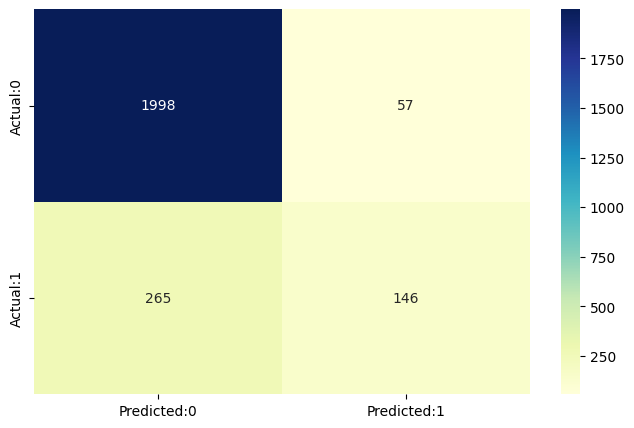

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

cm_reference = pd.DataFrame(np.array(["TP","FP","FN","TN"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

TP=cm[0,0]
TN=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)


y_pred_prob=logreg.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no purchase (0)','Prob of purchase (1)'])
y_pred_prob_df.head(10)